## Doing K nearest neighbors algorithm

This code will apply the K Nearest Neighbors algorithm (KNN) to the IMDB Dataset based on vectors computed using TF-IDF
We will use a training set of size 20000 for each class (i.e. 20k positive and 20k negative reviews)


In [8]:
import pickle
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from tqdm import tqdm
from sklearn.decomposition import PCA
import plotly.express as px


## Un comment this lines the first time you run the code
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')


In [9]:
with open('./normalized_TF_IDF_matrix.pckl', 'rb') as f:
    normalized_TF_IDF_matrix = pickle.load(f)

In [10]:
normalized_TF_IDF_matrix

array([[-0.0038498 , -0.0038498 , -0.0038498 , ..., -0.0038498 ,
        -0.0038498 ,  0.09975314],
       [-0.003268  , -0.003268  , -0.003268  , ..., -0.003268  ,
        -0.003268  , -0.003268  ],
       [-0.00354295, -0.00354295, -0.00354295, ..., -0.00354295,
        -0.00354295, -0.00354295],
       ...,
       [-0.003316  , -0.003316  , -0.003316  , ..., -0.003316  ,
        -0.003316  , -0.003316  ],
       [-0.00366195, -0.00366195, -0.00366195, ..., -0.00366195,
        -0.00366195, -0.00366195],
       [-0.00298504, -0.00298504, -0.00298504, ..., -0.00298504,
        -0.00298504, -0.00298504]], shape=(50000, 2000))

In [13]:
np.linalg.norm(normalized_TF_IDF_matrix[1, :])

np.float64(1.0000000000000007)

In [14]:
data = pd.read_csv("./IMDB_Dataset.csv")

In [15]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
# Create the training set and test set
positive_Ix = list(data[data['sentiment']=="positive"].index)
negative_Ix = list(data[data['sentiment']=="negative"].index)

train_Ix = np.concatenate([positive_Ix[:20000], negative_Ix[:20000]])
test_Ix = np.concatenate([positive_Ix[20000:], negative_Ix[20000:]])


In [17]:
train_Ix[-10:]

array([39969, 39970, 39974, 39976, 39978, 39979, 39980, 39981, 39983,
       39985])

In [18]:
train_vectors = normalized_TF_IDF_matrix[train_Ix, :]
test_vectors = normalized_TF_IDF_matrix[test_Ix, :]

In [19]:
train_vectors

array([[-0.0038498 , -0.0038498 , -0.0038498 , ..., -0.0038498 ,
        -0.0038498 ,  0.09975314],
       [-0.003268  , -0.003268  , -0.003268  , ..., -0.003268  ,
        -0.003268  , -0.003268  ],
       [-0.00354295, -0.00354295, -0.00354295, ..., -0.00354295,
        -0.00354295, -0.00354295],
       ...,
       [-0.00234925, -0.00234925, -0.00234925, ..., -0.00234925,
        -0.00234925, -0.00234925],
       [-0.00397128, -0.00397128, -0.00397128, ..., -0.00397128,
        -0.00397128, -0.00397128],
       [-0.0029042 , -0.0029042 , -0.0029042 , ..., -0.0029042 ,
        -0.0029042 , -0.0029042 ]], shape=(40000, 2000))

In [20]:
test_vectors

array([[-0.00509787, -0.00509787, -0.00509787, ..., -0.00509787,
        -0.00509787, -0.00509787],
       [-0.00373814, -0.00373814, -0.00373814, ..., -0.00373814,
        -0.00373814, -0.00373814],
       [-0.00449679, -0.00449679, -0.00449679, ..., -0.00449679,
        -0.00449679, -0.00449679],
       ...,
       [-0.003316  , -0.003316  , -0.003316  , ..., -0.003316  ,
        -0.003316  , -0.003316  ],
       [-0.00366195, -0.00366195, -0.00366195, ..., -0.00366195,
        -0.00366195, -0.00366195],
       [-0.00298504, -0.00298504, -0.00298504, ..., -0.00298504,
        -0.00298504, -0.00298504]], shape=(10000, 2000))

In [25]:
cosine_train_test_vectors = np.dot(train_vectors, test_vectors.T)


In [26]:
distances_from_test_to_train = 1 - np.abs(cosine_train_test_vectors)

In [27]:
with open('./distances_from_test_to_train.pckl', 'wb') as f:
    pickle.dump(distances_from_test_to_train, f)

In [29]:
distances_from_test_to_train[:, 0]

array([0.98374036, 0.98699907, 0.98797618, ..., 0.93380536, 0.98259355,
       0.99487187], shape=(40000,))

In [60]:
sorted_indexes = np.zeros_like(distances_from_test_to_train.T)
for i in tqdm(range(distances_from_test_to_train.shape[1])):
    sorted_indexes[i] = np.argsort(distances_from_test_to_train[:, i])

100%|██████████| 10000/10000 [01:34<00:00, 106.37it/s]


In [61]:
sorted_indexes

array([[3.1420e+04, 3.3417e+04, 2.5000e+01, ..., 2.6851e+04, 2.7358e+04,
        2.8452e+04],
       [9.2700e+02, 1.3340e+04, 1.9600e+04, ..., 1.4712e+04, 3.7839e+04,
        1.7552e+04],
       [3.4480e+03, 2.9680e+03, 1.8984e+04, ..., 2.1856e+04, 7.8600e+02,
        1.8659e+04],
       ...,
       [1.3801e+04, 2.2709e+04, 7.4710e+03, ..., 5.8140e+03, 3.0235e+04,
        2.4620e+03],
       [3.2239e+04, 1.6131e+04, 2.4336e+04, ..., 1.4254e+04, 2.2586e+04,
        2.1230e+04],
       [3.6861e+04, 1.9525e+04, 3.4515e+04, ..., 8.4260e+03, 1.4599e+04,
        2.4201e+04]], shape=(10000, 40000))

In [115]:
labels = ["positive"] * 20000 + ["negative"] * 20000
def classify_document(i, sorted_indexes, labels, k=10):
    """
    Classify the document i according to the distance matrice and the value of k
    """
    k_nearest_labels = [labels[int(Ix)] for Ix in sorted_indexes[i, :k]]
    frequencies = Counter(k_nearest_labels)
    assigned_class = sorted(frequencies, key=lambda k : frequencies[k], reverse=True)[0]
    return assigned_class

def compute_confusion_matrix(sorted_indexes, labels, k=10):
    matrix = np.array([[0, 0], [0, 0]])
    for i in range(5000): # The first 5k are positive
        assigned_class = classify_document(i, sorted_indexes, labels, k)
        if assigned_class == 'positive':
            matrix[0, 0] +=1
        else:
            matrix[0, 1] +=1
    for i in range(5000, 10000): # The others 5k are negative
        assigned_class = classify_document(i, sorted_indexes, labels, k)
        if assigned_class == 'negative':
            matrix[1, 1] +=1
        else:
            matrix[1, 0] +=1
    n1, n2 = matrix.sum(axis=1)
    matrix[0, 0] = matrix[0, 0] / n1 *100
    matrix[0, 1] = matrix[0, 1] / n1 * 100
    matrix[1, 0] = matrix[1, 0] / n2 * 100
    matrix[1, 1] = matrix[1, 1] / n2 * 100
    return matrix


In [116]:
k = 2000
confusion_matrix_k = compute_confusion_matrix(sorted_indexes, labels, k)


In [117]:
confusion_matrix_k

array([[85, 14],
       [15, 84]])

In [122]:
accuracy_positive_reviews = []
accuracy_negative_reviews = []
x_values = [1, 10, 20, 50, 100, 200, 500, 700, 1000, 1200, 1500, 1900, 2000, 3000] 
for i in tqdm(range(len(x_values))):
    confusion_matrix_i = compute_confusion_matrix(sorted_indexes, labels, x_values[i])
    accuracy_positive_reviews.append(confusion_matrix_i[0, 0])
    accuracy_negative_reviews.append(confusion_matrix_i[1, 1])



100%|██████████| 14/14 [00:36<00:00,  2.60s/it]


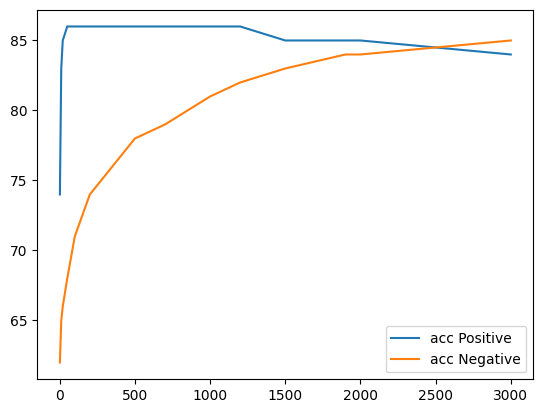

In [123]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_values, accuracy_positive_reviews, label="acc Positive")
ax.plot(x_values, accuracy_negative_reviews, label="acc Negative")
plt.legend(loc='best')
plt.show()